# Simple test of compressed sensing methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

from scipy.linalg import hadamard

In [2]:
m = 500
n = 1000
Amat = np.random.normal(0,1, (m,n))
A = LinearMatrix(Amat)
k = 100
r = 20
HTs = Sparsity(k)
HTr = FixedRank(r)

In [3]:
x_true = np.random.normal(0,1, (n, 1)) / np.sqrt(n)
sub, x_true = HTs.project(x_true)
b = A.matvec(x_true)
problem = LinearProblem(A, b, HTs, x_true = x_true)

In [4]:
solver = NIHT(logverbosity = 2)
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm	     xdist
    1	+8.5614398598680064e+07	5.62391866e+05
    2	+1.6598043641297152e+07	2.58319132e+05
    3	+1.4132798527390631e+07	2.45571980e+05
    4	+5.5452980530874664e+06	1.53526417e+05
    5	+4.5990844145155679e+06	1.42729011e+05
    6	+2.1673938637595773e+06	9.74620204e+04
    7	+1.7110587370117642e+06	8.77611431e+04
    8	+9.5479035522491159e+05	6.54756948e+04
    9	+7.3803647469982156e+05	5.80696158e+04
   10	+4.4464972036811966e+05	4.49899474e+04
   11	+3.3647399034264183e+05	3.93554849e+04
   12	+2.1142543421935363e+05	3.11617399e+04
   13	+1.5427585837737753e+05	2.66533043e+04
   14	+9.9344549969876243e+04	2.13799964e+04
   15	+7.1168137949292286e+04	1.81295910e+04
   16	+4.7661105766586697e+04	1.48390172e+04
   17	+3.3249380178846113e+04	1.24037174e+04
   18	+2.2346173784466853e+04	1.01689771e+04
   19	+1.5347978772518531e+04	8.43871799e+03
   20	+1.0362697320386591e+04	6.92839180e+03
   21	+7.1555979387105763e+03	5.75802160e+03
   22	+4

In [5]:
np.linalg.norm(x - x_true, 2)/ np.linalg.norm(x_true, 2)

9.015342927933674e-06

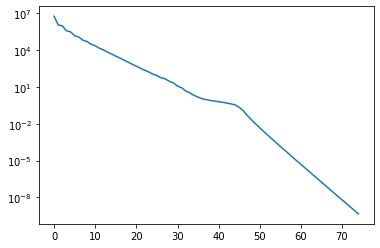

In [6]:
plt.semilogy(opt_log['iterations']['fx'] / np.linalg.norm(b))